In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
def euclidean(a, b):
    return np.sqrt((a['weight']-b['weight'])**2 + (a['sweetness']-b['sweetness'])**2)

def manhattan(a,b):
    return abs(a['weight']-b['weight']) + abs(a['sweetness']-b['sweetness'])

def minkowski(a,b, p=3):
    return (abs(a['weight']-b['weight'])**p + abs(a['sweetness']-b['sweetness'])**p)**(1/p)

In [18]:
def knn_classify(new_fruit, fruits, k=3):
    distances = []
    for fruit in fruits:
        distances.append((euclidean(fruit, new_fruit), fruit['label']))
    distances.sort(key = lambda x: x[0])
    nearest_neighbours = distances[:k]
    labels = [x[1] for x in nearest_neighbours]
    return max(labels, key=labels.count)

In [19]:
fruits = [
    {'id': 1, 'weight': 180, 'sweetness': 7, 'label': 'Apple'},
    {'id': 2, 'weight': 200, 'sweetness': 6, 'label': 'Apple'},
    {'id': 3, 'weight': 150, 'sweetness': 4, 'label': 'Orange'},
    {'id': 4, 'weight': 170, 'sweetness': 5, 'label': 'Orange'},
    {'id': 5, 'weight': 160, 'sweetness': 6, 'label': 'Apple'},
    {'id': 6, 'weight': 140, 'sweetness': 3, 'label': 'Orange'}
]

new_fruit = {'weight': 165, 'sweetness': 5.5}

label = knn_classify(new_fruit, fruits)
print(f'The new fruit is {label}')

The new fruit is Apple


In [20]:
for fruit in fruits:
    print(f'Fruit : {fruit['id']}')
    print(f'Euclidean distance: {euclidean(fruit, new_fruit):.2f}')
    print(f'Manhattan Distance : {manhattan(fruit, new_fruit):.2f}')
    print(f'Minkowski Distance : {minkowski(fruit, new_fruit):.2f}')

Fruit : 1
Euclidean distance: 15.07
Manhattan Distance : 16.50
Minkowski Distance : 15.00
Fruit : 2
Euclidean distance: 35.00
Manhattan Distance : 35.50
Minkowski Distance : 35.00
Fruit : 3
Euclidean distance: 15.07
Manhattan Distance : 16.50
Minkowski Distance : 15.00
Fruit : 4
Euclidean distance: 5.02
Manhattan Distance : 5.50
Minkowski Distance : 5.00
Fruit : 5
Euclidean distance: 5.02
Manhattan Distance : 5.50
Minkowski Distance : 5.00
Fruit : 6
Euclidean distance: 25.12
Manhattan Distance : 27.50
Minkowski Distance : 25.01


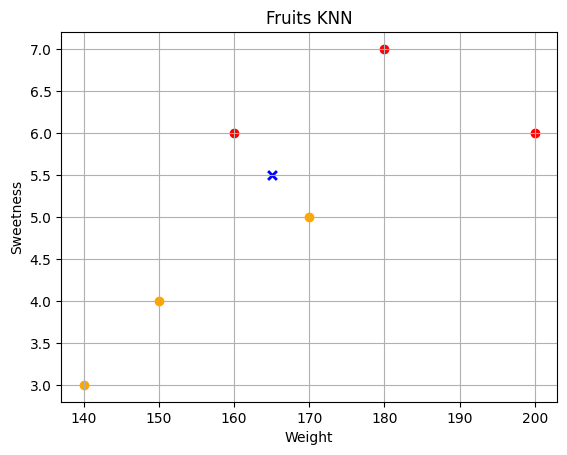

In [21]:
def plot_data():
    for fruit in fruits:
        if fruit['label']=='Apple':
            plt.scatter(fruit['weight'], fruit['sweetness'], label=fruit['label'], marker='o', color='red')
        elif fruit['label']=='Orange':
            plt.scatter(fruit['weight'], fruit['sweetness'], label=fruit['label'], marker='o', color='orange')
        plt.scatter(new_fruit['weight'], new_fruit['sweetness'], label=label, marker='x', color='blue')
    plt.xlabel('Weight')
    plt.ylabel('Sweetness')
    plt.title('Fruits KNN')
    plt.grid(True)
    plt.show()

plot_data()